## Fetch data from Harvard Dataverse

In [1]:
from scanninglaw.config import config
config['data_dir'] = '/data/asfe2/Projects/testscanninglaw/'

import scanninglaw.times
scanninglaw.times.fetch()

Checking existing file "/data/asfe2/Projects/testscanninglaw/cog/cog_dr2_gaps_and_fractions_v1.h5" to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file "/data/asfe2/Projects/testscanninglaw/cog/cog_dr2_scanning_law_v2.csv" to see if MD5 sum matches ...
File exists. Not overwriting.


## Find scan times

In [2]:
import scanninglaw.times as times
from scanninglaw.source import Source

In [3]:
dr2_sl = times.dr2_sl(version='cog3_2020')

Loading auxilliary data ...
t = 34.627 s
  auxilliary:  14.352 s
          sf:   3.553 s
interpolator:  16.722 s


In [4]:
c = Source(
        '22h54m51.68s',
        '-51d11m44.19s',
        photometry={'gaia_g':16.02},
        frame='icrs')

In [5]:
dr2_sl(c, return_fractions=False, fov=1)

{'counts': [array([24])],
 'times': [array([[1714.1732678 , 1714.42343301, 1749.8088652 , 1779.2976099 ,
          1803.54125145, 1898.41605922, 1908.92064768, 2005.86806435,
          2074.61994242, 2074.87011178, 2075.12028061, 2075.37044896,
          2075.62061702, 2075.8707848 , 2076.12095247, 2076.37112013,
          2076.62128786, 2076.8714558 , 2077.12162405, 2077.37179271,
          2077.62196192, 2272.95605283, 2287.95947258, 2325.42742226]])]}

## Get scan fractions

In [6]:
dr2_sl = times.dr2_sl(version='cog3_2020', load_fractions=True)

Loading auxilliary data ...
Loading and Interpolating fractions, this only needs to be done once for the class instance.
Loading...
Interpolating...
t = 55.674 s
  auxilliary:  34.767 s
          sf:   3.526 s
interpolator:  17.381 s


In [7]:
s5_hvs1 = Source('22h54m51.68s',
                 '-51d11m44.19s',
           photometry={'gaia_g':16.02},
           frame='icrs')

scans = dr2_sl(s5_hvs1, return_fractions=True, fov=1)
print('obs times FoV1:', scans['times'][0])
print('obs fraction FoV1:', scans['fractions'][0])

obs times FoV1: [[1714.1732678  1714.42343301 1749.8088652  1779.2976099  1803.54125145
  1898.41605922 1908.92064768 2005.86806435 2074.61994242 2074.87011178
  2075.12028061 2075.37044896 2075.62061702 2075.8707848  2076.12095247
  2076.37112013 2076.62128786 2076.8714558  2077.12162405 2077.37179271
  2077.62196192 2272.95605283 2287.95947258 2325.42742226]]
obs fraction FoV1: [[0.94576132 0.93393135 0.92335665 0.73685056 0.80241108 0.94317389
  0.95871592 0.94810557 0.95219266 0.96254265 0.97099262 0.97288263
  0.94382262 0.94345266 0.94751263 0.96179992 0.96427995 0.96250993
  0.94215995 0.94588995 0.95542991 0.96574801 0.95102572 0.95739424]]


## Get number of scans

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as units

from scanninglaw.source import Source
from scanninglaw import cog_i

import astropy.units as units

l = np.linspace(-180.0, 180.0, 500)
b = np.linspace(-90.0,90.0, 250)
l, b = np.meshgrid(l, b)
g = 21.0*np.ones(l.shape)

coords = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

In [15]:
scans = dr2_sl(coords, return_times=False, return_fractions=False, fov=12, progress=True)
# progress='notebook' will use tqdm.tqdm_notebook progress bar.

100%|██████████| 125000/125000 [06:52<00:00, 303.27it/s]


(-180.0, 180.0, -90.0, 90.0)

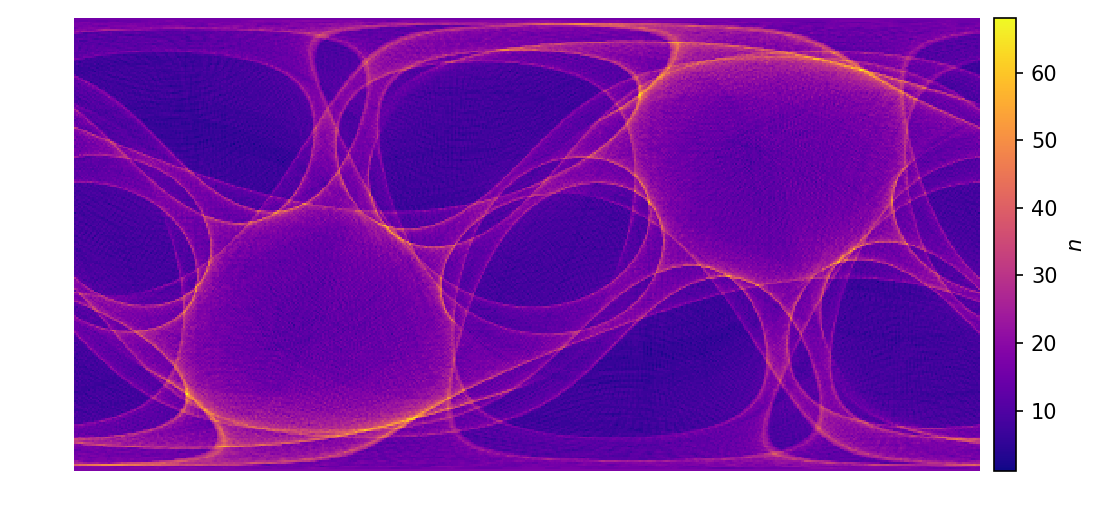

In [14]:
fig = plt.figure(figsize=(12,4), dpi=150)

nscan = scans['counts'][0]+scans['counts'][1]
plt.imshow(nscan,
        origin='lower',
        interpolation='nearest',
        cmap='plasma', aspect='equal',
        extent=[-180,180,-90,90])
cbar = plt.colorbar(pad=0.01)
cbar.set_label(r'$n$')

plt.axis('off')